In [10]:
#Create an engine to connect to the census database.
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

from dotenv import load_dotenv

#load_dotenv()

username = os.environ.get('id')
password = os.environ.get('password')

postgres_path = username + ":" + password + "@localhost:5432/EmployeeSQL_dB"

from sqlalchemy import create_engine
engine = create_engine(f"postgresql://{postgres_path}")
connection = engine.connect()

#engine

In [11]:
# connect to PostgreSQL server
dbConnection = engine.connect();


In [12]:
# Read data from PostgreSQL database salaries table and load into a DataFrame instance
salary_df = pd.read_sql("select * from \"salaries\"", dbConnection);
print(salary_df);

        emp_no  salary
0        10001   60117
1        10002   65828
2        10003   40006
3        10004   40054
4        10005   78228
...        ...     ...
300019  499995   40000
300020  499996   58058
300021  499997   49597
300022  499998   40000
300023  499999   63707

[300024 rows x 2 columns]


In [13]:
# Read data from PostgreSQL database salaries, titles and employees and load into a Dataframe instance
emptitle_df = pd.read_sql('''select t.title, round(avg(s.salary)) as AvgSalary from salaries s, employees e, titles t
                            WHERE	s.emp_no	= e.emp_no
                            AND		e.emp_title	= t.title_id
                            GROUP BY t.title''', dbConnection);
print(emptitle_df)


                title  avgsalary
0  Assistant Engineer    48564.0
1            Engineer    48535.0
2             Manager    51531.0
3     Senior Engineer    48507.0
4        Senior Staff    58550.0
5               Staff    58465.0
6    Technique Leader    48583.0


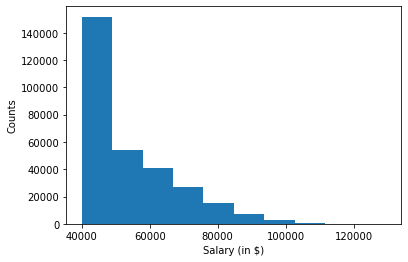

In [14]:
# Create an histogram to visualize the most common salary ranges for employees
plt.hist(salary_df["salary"])
plt.xlabel('Salary (in $)')
plt.ylabel('Counts')
plt.show()

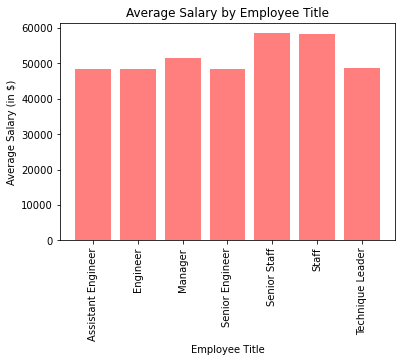

In [15]:
# Set x axis and tick locations
x_axis = np.arange(len(emptitle_df))
tick_locations = [value for value in x_axis]

#plt.figure(figsize=(20,3))
plt.bar(x_axis, emptitle_df["avgsalary"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, emptitle_df["title"], rotation="vertical")
plt.title("Average Salary by Employee Title")
plt.xlabel("Employee Title")
plt.ylabel("Average Salary (in $)")
plt.show()


In [16]:
# Close the database connection

dbConnection.close();